In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hr = pd.read_csv('HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [5]:
hr['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
hr.rename(columns={'sales':'dept'},inplace =True)

In [9]:
hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
x= hr.drop('left',axis=1)
y=hr['left']

In [11]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [18]:
x= pd.get_dummies(x)

In [13]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=123)

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=20,oob_score=True,n_jobs=-1,
                       random_state=444)

#by activating the oob_score
#we can check the oob error and 
#performs bootstapping calculates the oob error rather than calculationg error 


In [21]:
clf.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  n_jobs=-1, oob_score=True, random_state=444)

In [22]:
clf.score(xtest,ytest)

0.992

In [23]:
clf.oob_score_

0.986165513792816

In [24]:
clf.oob_score

True

In [25]:
for w in range(10,300,20):
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=w,oob_score=True,n_jobs=-1,
                       random_state=444)
    clf.fit(xtrain,ytrain)
    oob = clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB Score: '+str(oob))
    print('----------------------------------------')

C:\Users\tsharmili\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tsharmili\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


For n_estimators = 10
OOB Score: 0.9803316943078589
----------------------------------------
For n_estimators = 30
OOB Score: 0.9864988749062422
----------------------------------------
For n_estimators = 50
OOB Score: 0.9879156596383032
----------------------------------------
For n_estimators = 70
OOB Score: 0.9884990415867989
----------------------------------------
For n_estimators = 90
OOB Score: 0.988832402700225
----------------------------------------
For n_estimators = 110
OOB Score: 0.9887490624218684
----------------------------------------
For n_estimators = 130
OOB Score: 0.9889157429785815
----------------------------------------
For n_estimators = 150
OOB Score: 0.9889990832569381
----------------------------------------
For n_estimators = 170
OOB Score: 0.9894157846487207
----------------------------------------
For n_estimators = 190
OOB Score: 0.9893324443703642
----------------------------------------
For n_estimators = 210
OOB Score: 0.9892491040920076
-------------

In [ ]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=150,oob_score=True,n_jobs=-1,
                       random_state=444)

### Feature Importance

In [27]:
#clf is an array 

clf.estimators_[0]

DecisionTreeClassifier(random_state=426218396)

In [28]:
clf.estimators_[0].feature_importances_

array([4.89550259e-01, 1.44668996e-01, 1.15237850e-01, 6.65339066e-02,
       1.62947421e-01, 8.56121998e-04, 3.99623039e-04, 4.09442159e-04,
       8.67764082e-04, 8.50252833e-04, 1.23656609e-03, 1.07771784e-03,
       2.75732473e-03, 9.21416261e-04, 1.86215184e-03, 2.27956139e-03,
       3.41064528e-03, 1.01170155e-03, 7.78482351e-04, 2.34279495e-03])

In [29]:
#calculating feature imp of all the estimators and then finding the avg

imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)

imp = np.mean(imp,axis=0)

In [31]:
features_imp= pd.Series(imp, index=x.columns.tolist())

In [32]:
features_imp.sort_values(ascending=False)

satisfaction_level       0.499703
last_evaluation          0.144318
time_spend_company       0.141968
number_project           0.105338
average_montly_hours     0.085662
salary_low               0.003596
dept_technical           0.003249
dept_support             0.002384
dept_sales               0.002319
salary_medium            0.002299
Work_accident            0.001556
dept_IT                  0.001479
salary_high              0.001273
dept_accounting          0.001258
dept_RandD               0.000864
dept_management          0.000807
dept_marketing           0.000777
dept_hr                  0.000542
dept_product_mng         0.000433
promotion_last_5years    0.000174
dtype: float64

<AxesSubplot:>

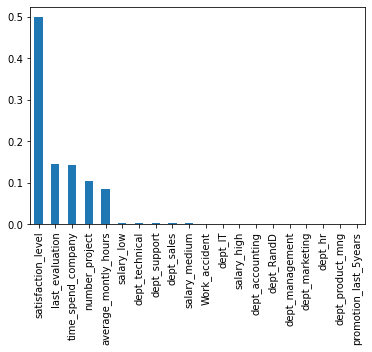

In [35]:
features_imp.sort_values(ascending=False).plot(kind='bar')

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf2 = RandomForestClassifier(n_estimators=80,n_jobs=-1,random_state=666,oob_score=True)

In [38]:
clf2.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=666)

In [ ]:
#base estimator  - default - decision tree classifier

In [40]:
clf2.oob_score_

0.9894991249270773

In [41]:
for w in range(10,300,20):
    clf2 = clf2 = RandomForestClassifier(n_estimators=w,n_jobs=-1,
                                         random_state=666,oob_score=True)
    clf2.fit(xtrain,ytrain)
    oob = clf2.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB Score: '+str(oob))
    print('----------------------------------------')

C:\Users\tsharmili\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tsharmili\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


For n_estimators = 10
OOB Score: 0.9809150762563547
----------------------------------------
For n_estimators = 30
OOB Score: 0.9879989999166597
----------------------------------------
For n_estimators = 50
OOB Score: 0.9893324443703642
----------------------------------------
For n_estimators = 70
OOB Score: 0.9892491040920076
----------------------------------------
For n_estimators = 90
OOB Score: 0.9894157846487207
----------------------------------------
For n_estimators = 110
OOB Score: 0.9898324860405033
----------------------------------------
For n_estimators = 130
OOB Score: 0.9899158263188599
----------------------------------------
For n_estimators = 150
OOB Score: 0.990082506875573
----------------------------------------
For n_estimators = 170
OOB Score: 0.9901658471539295
----------------------------------------
For n_estimators = 190
OOB Score: 0.9904992082673556
----------------------------------------
For n_estimators = 210
OOB Score: 0.9903325277106425
-------------

In [42]:
clf2 = RandomForestClassifier(n_estimators=190,n_jobs=-1,random_state=667,oob_score=True)
clf2.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=190, n_jobs=-1, oob_score=True,
                       random_state=667)

In [43]:
#here we can find the avg of the feature importance directly
# this is the functionality of random forest

imp_features= pd.Series(clf2.feature_importances_,index= x.columns.tolist())

In [44]:
imp_features.sort_values(ascending=False)

satisfaction_level       0.320224
time_spend_company       0.183346
number_project           0.175523
average_montly_hours     0.146614
last_evaluation          0.123775
Work_accident            0.011007
salary_low               0.007310
salary_high              0.005874
dept_technical           0.003795
salary_medium            0.003624
dept_sales               0.003325
dept_support             0.002700
promotion_last_5years    0.001861
dept_IT                  0.001819
dept_accounting          0.001766
dept_management          0.001745
dept_RandD               0.001659
dept_hr                  0.001492
dept_marketing           0.001318
dept_product_mng         0.001224
dtype: float64

<AxesSubplot:>

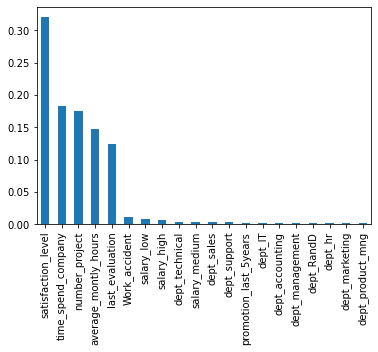

In [45]:
imp_features.sort_values(ascending=False).plot(kind='bar')

### Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
clf= GradientBoostingClassifier(n_estimators=80,random_state=334)

In [48]:
clf.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=80, random_state=334)

In [49]:
clf.score(xtest,ytest)

0.9753333333333334

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
mod = GridSearchCV(clf, param_grid={'n_estimators':[60,70,80,100,120,140,160]})
mod.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=80,
                                                  random_state=334),
             param_grid={'n_estimators': [60, 70, 80, 100, 120, 140, 160]})

In [52]:
mod.best_estimator_

GradientBoostingClassifier(n_estimators=160, random_state=334)

<AxesSubplot:>

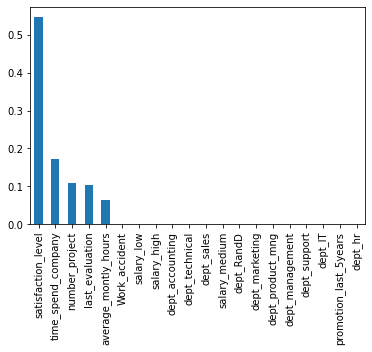

In [54]:
pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar')

### ADABOOST Classifier

Adaptive Boosting


In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
clf3 = AdaBoostClassifier(n_estimators= 80,learning_rate=0.5,random_state=256)
clf3.fit(xtrain, ytrain)

AdaBoostClassifier(learning_rate=0.5, n_estimators=80, random_state=256)

In [60]:
clf3.score(xtest,ytest)

0.9603333333333334

In [61]:
mod1 = GridSearchCV(clf, param_grid={'n_estimators':np.arange(80,170,10),'learning_rate':[0.2,0.3,0.4]})
mod1.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=80,
                                                  random_state=334),
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'n_estimators': array([ 80,  90, 100, 110, 120, 130, 140, 150, 160])})

In [63]:
mod1.best_estimator_

GradientBoostingClassifier(learning_rate=0.4, n_estimators=150,
                           random_state=334)

In [84]:
clf3 = AdaBoostClassifier(n_estimators= 150,learning_rate=0.4,random_state=256)
clf3.fit(xtrain, ytrain)

AdaBoostClassifier(learning_rate=0.4, n_estimators=150, random_state=256)

In [86]:
#pd.Series(clf3.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar')

### Excercise

In [64]:
data= pd.read_csv('iris.csv')

In [65]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
data.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [68]:
x= data.drop('Species',axis=1)

In [69]:
y = data['Species']

In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=123)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
clf11 = GradientBoostingClassifier(n_estimators=80,random_state=999)

In [77]:
clf11.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=80, random_state=999)

In [78]:
clf11.score(xtest,ytest)

0.9666666666666667

<AxesSubplot:>

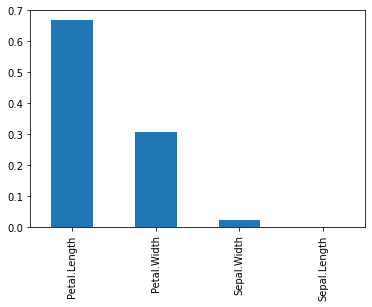

In [80]:
pd.Series(clf11.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar')

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
clf22= AdaBoostClassifier(n_estimators=90,learning_rate=0.9,random_state=145)

In [90]:
mod22 = GridSearchCV(clf22, param_grid={'n_estimators':np.arange(80,170,10),'learning_rate':[0.2,0.3,0.4]})
mod22.fit(xtrain,ytrain)

GridSearchCV(estimator=AdaBoostClassifier(learning_rate=0.9, n_estimators=90,
                                          random_state=145),
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'n_estimators': array([ 80,  90, 100, 110, 120, 130, 140, 150, 160])})

In [91]:
mod22.best_estimator_

AdaBoostClassifier(learning_rate=0.2, n_estimators=80, random_state=145)

In [93]:
clf22= AdaBoostClassifier(n_estimators=80,learning_rate=0.2,random_state=145)
clf22.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.2, n_estimators=80, random_state=145)

<AxesSubplot:>

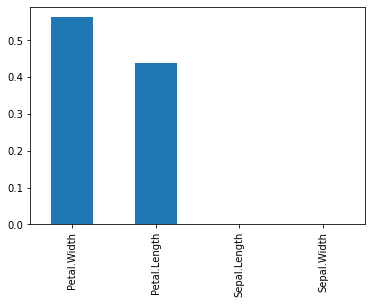

In [94]:
pd.Series(clf22.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar')